In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import tensorflow as tf

In [3]:
import wget
sonnets=wget.download('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt',bar=None)

In [4]:
data=open(sonnets).read()
corpus=data.lower().split('\n')

In [5]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1

In [6]:
# create input sequences using list of tokens
input_sequences=[]
for line in corpus:
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence=token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [7]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [8]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [22]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words,100,input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(total_words/2,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(total_words,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_12 (Dense)             (None, 1605)              162105    
_________________________________________________________________
dense_13 (Dense)             (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
_________________________________________________________________


In [23]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
15462/15462 [==============================] - 87s 6ms/sample - loss: 6.8914 - acc: 0.0211
Epoch 2/100
15462/15462 [==============================] - 79s 5ms/sample - loss: 6.4967 - acc: 0.0210
Epoch 3/100
15462/15462 [==============================] - 79s 5ms/sample - loss: 6.3948 - acc: 0.0249
Epoch 4/100
15462/15462 [==============================] - 79s 5ms/sample - loss: 6.2747 - acc: 0.0279
Epoch 5/100
15462/15462 [==============================] - 79s 5ms/sample - loss: 6.1816 - acc: 0.0364
Epoch 6/100
15462/15462 [==============================] - 79s 5ms/sample - loss: 6.1041 - acc: 0.0391
Epoch 7/100
15462/15462 [==============================] - 79s 5ms/sample - loss: 6.0247 - acc: 0.0407
Epoch 8/100
15462/15462 [==============================] - 80s 5ms/sample - loss: 5.9466 - acc: 0.0435
Epoch 9/100
15462/15462 [==============================] - 79s 5ms/sample - loss: 5.8644 - acc: 0.0493
Epoch 10/100
15462/15462 [==============================] - 79s 5ms/sampl

15462/15462 [==============================] - 89s 6ms/sample - loss: 1.3707 - acc: 0.7664
Epoch 79/100
15462/15462 [==============================] - 83s 5ms/sample - loss: 1.3452 - acc: 0.7718
Epoch 80/100
15462/15462 [==============================] - 81s 5ms/sample - loss: 1.3372 - acc: 0.7691
Epoch 81/100
15462/15462 [==============================] - 80s 5ms/sample - loss: 1.3240 - acc: 0.7744
Epoch 82/100
15462/15462 [==============================] - 88s 6ms/sample - loss: 1.3024 - acc: 0.77639s - loss: 1.2948
Epoch 83/100
15462/15462 [==============================] - 84s 5ms/sample - loss: 1.3020 - acc: 0.7753
Epoch 84/100
15462/15462 [==============================] - 83s 5ms/sample - loss: 1.2762 - acc: 0.7824
Epoch 85/100
15462/15462 [==============================] - 82s 5ms/sample - loss: 1.2588 - acc: 0.7846
Epoch 86/100
15462/15462 [==============================] - 83s 5ms/sample - loss: 1.2612 - acc: 0.7820
Epoch 87/100
15462/15462 [==============================] - 

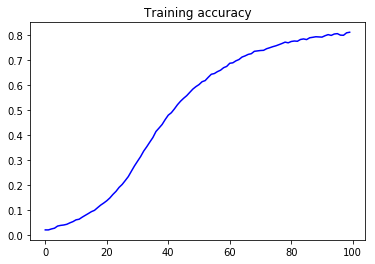

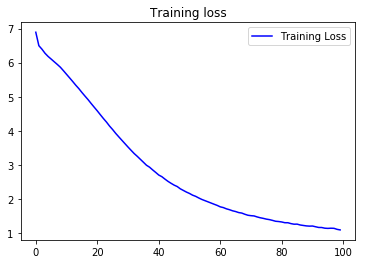

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [26]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope or me thy name alone still foes lend make days new rare rare still live shows spent more rage doth men's fled be fled too fled old 'will ' can ' can give prove forth other blind friend bright loss forth sight days days seem bright days o'er stand forth him days forth men days live so ill ill good pride words new ill still new now be still dear 'will ' bearing own 'will pride ' doth shine bad lost doth hide me so bold me still so hell doth stand still foes hate leaves lend make worth him
